In [213]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, f1_score, roc_auc_score

In [214]:
datos = pd.read_csv('Encuesta_ingreso_202401.csv', sep=';', encoding='latin1')

In [215]:
print(datos.columns)

Index(['Nacionalidad', 'Edad', 'Género', 'Barrio/Localidad',
       'Tipo de vacación preferida', 'Estilo de música preferido',
       'Género preferido de películas', 'Deporte preferido',
       'Hobbie preferido', '¿En que rubro trabajás o te gustaría trabajar?',
       '¿Qué esperan de la carrera?',
       '¿Qué esperan de la materia? ¿Qué temas quisieran ver?',
       '¿Qué algoritmos conocés?',
       '¿Sobre qué temas trabajaste en los TPs de Análisis Predictivo?',
       '¿Qué película te gustó más o quisieras ver primero?'],
      dtype='object')


In [216]:
columnasRelevantes = ['Edad','Género', 'Barrio/Localidad',
       'Tipo de vacación preferida', 'Estilo de música preferido',
       'Género preferido de películas', 'Deporte preferido',
       'Hobbie preferido', '¿Qué película te gustó más o quisieras ver primero?'] 
datosFiltrados = datos[columnasRelevantes]

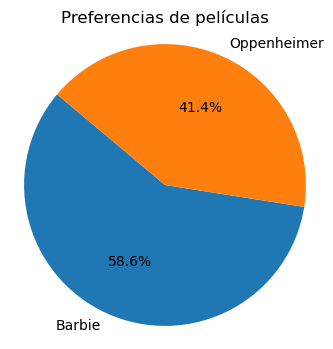

In [217]:
movie_preferences_counts = datosFiltrados['¿Qué película te gustó más o quisieras ver primero?'].value_counts()

labels = movie_preferences_counts.index
sizes = movie_preferences_counts.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Preferencias de películas')
plt.show()

In [218]:
label_encoder = LabelEncoder()
for column in datosFiltrados.columns:
    if datosFiltrados[column].dtype == 'object':
        datosFiltrados[column] = label_encoder.fit_transform(datosFiltrados[column])

print(datosFiltrados)

    Edad  Género  Barrio/Localidad  Tipo de vacación preferida  \
0     22       0                 2                           1   
1     22       0                14                           2   
2     22       1                 3                           2   
3     26       1                11                           1   
4     22       0                15                           2   
5     26       1                 7                           2   
6     21       0                 0                           2   
7     21       1                12                           1   
8     24       0                14                           2   
9     22       1                 9                           1   
10    23       1                 6                           0   
11    23       0                 9                           0   
12    21       0                 9                           1   
13    22       0                 6                           2   
14    21  

/var/folders/22/kk3jgz8n1yn0zwh0vft67d040000gn/T/ipykernel_93215/860948780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosFiltrados[column] = label_encoder.fit_transform(datosFiltrados[column])
/var/folders/22/kk3jgz8n1yn0zwh0vft67d040000gn/T/ipykernel_93215/860948780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosFiltrados[column] = label_encoder.fit_transform(datosFiltrados[column])
/var/folders/22/kk3jgz8n1yn0zwh0vft67d040000gn/T/ipykernel_93215/860948780.py:4: SettingWithCopyWarning:

In [219]:
datosFiltrados = datosFiltrados.dropna()

In [220]:
X = datosFiltrados.drop('¿Qué película te gustó más o quisieras ver primero?', axis=1)
y = datosFiltrados['¿Qué película te gustó más o quisieras ver primero?']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
X = datosFiltrados.drop('¿Qué película te gustó más o quisieras ver primero?', axis=1)
y = datosFiltrados['¿Qué película te gustó más o quisieras ver primero?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',  
    'num_class': len(datosFiltrados['¿Qué película te gustó más o quisieras ver primero?'].unique()), 
    'eval_metric': 'merror'  
}

num_round = 100
model = xgb.train(params, dtrain, num_round)

y_pred = model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Exactitud del modelo XGBoost:", accuracy)
print("Precisión:", precision)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Exactitud del modelo XGBoost: 0.6666666666666666
Precisión: 0.75
F1-score: 0.75
AUC-ROC: 0.625
